In [1]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing_data.csv', sep='\s+', names=col_names, header=None)
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0,0.488,6.153,68.8,3.2797,3,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04


In [25]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'MEDV \n Price $1,000')

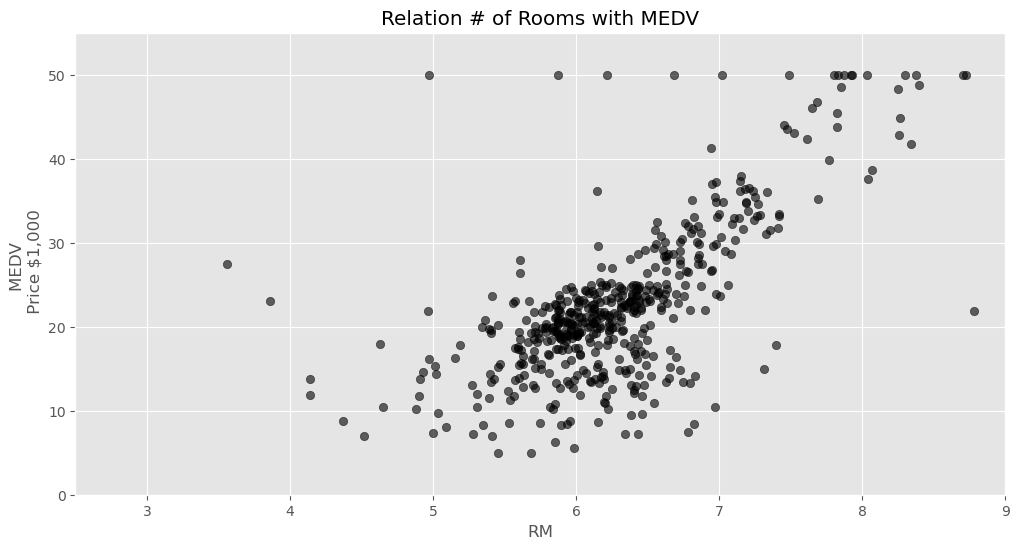

In [6]:
#방의 개수와 집값 간의 관계를 산점도로 표현

import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1,1, figsize=(12,6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6) # RM : 주택 당 평균 방 개수

ax1.set_title('Relation # of Rooms with MEDV') #MEDV : 주택 가격(중앙값) (단위 : $1,000)
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0,55)
ax1.set_ylabel('MEDV \n Price $1,000')

#결과 해석
## 주택 당 평균 방 개수가 많을 수록 주택 가격도 높다(선형 관계)

In [7]:
# 13개의 복잡한 피처가 맞물려 집값을 결정할 때 합리적으로 설명할 수 있는 초평면을 찾기 위해 피처 하나와 집값의 상관관계를 먼저 살펴보기

from sklearn import linear_model
import pandas as pd

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))


print('a value : ', linear_regression.intercept_) # 절편 = 모델이 예측한 선형 방정식에서 RM이 0일 때, 즉 독립 변수의 값이 0일 때 예측되는 집값
print('b value : ', linear_regression.coef_) #회귀계수(기울기) = RM 값이 한 단위 증가할 때마다 집값이 얼마나 변화하는지를 나타내는 값
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0], linear_regression.intercept_)) 


a value :  -32.395522645607585
b value :  [8.76050748]
MEDV = 8.76 * RM -32.40


In [9]:
linear_regression.coef_ #배열 형태로 되어있으므로 인덱싱처리를 해서 첫번째이자 유일한 값(피처를 RM 하나만 설정했으므로)을 가져옴

array([8.76050748])

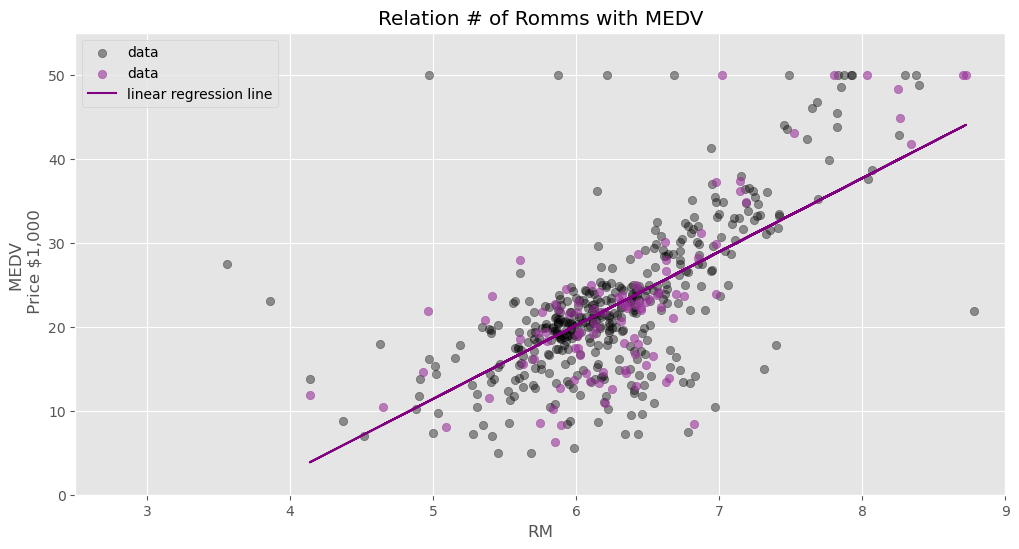

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(12,6))

ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='data')
ax1.scatter(X_test['RM'], y_test, color='#993299', alpha=0.6, label='data')

ax1.set_title('Relation # of Romms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

ax1.plot(X_test['RM'], prediction, color='purple', alpha=1, linestyle='-', label='linear regression line')

ax1.legend()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, prediction))

print('RMSE : %f' % (rmse))

RMSE : 6.383135


In [23]:
#13개 피처 모두 사용해서 집값을 예측하는 초평면 방정식 구하기

import xgboost

model = xgboost.XGBRegressor(objective='reg:squarederror') #objective = 손실함수(목적함수) reg:linear는 이전 버전이므로, reg:squarederror가 최신 버전임
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE : %f " % (rmse))

RMSE : 3.099807 


In [31]:
#XAI 적용하기

#JS 시각화 라이브러리 로드
shap.initjs()

#SHAP 값으로 모델의 예측 설명
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train) #기여도 값((404, 13) 크기의 X_train SHAP 값 저장)

#첫번째 데이터에 대한 구체적 SHAP 값 시각화
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :]) #force_plot : 특정 데이터 하나에 대한 SHAP값을 1차원 평면에 정렬

#결과 해석
## 예측 집값 : 25.29 , 집값 상승에 긍정적 영향을 준 요소는 LSTAT, 부정적 영향을 준 요소 : RM(즉, 방의 개수가 적어서 집값이 떨어지도록 작용함)

In [26]:
X_train.shape

(404, 13)

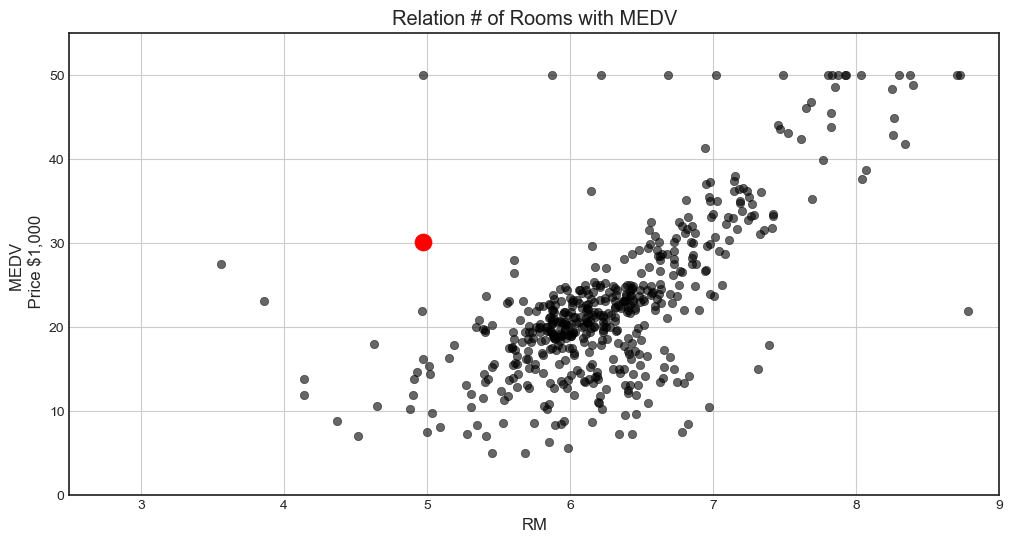

In [33]:
#특정 데이터의 방값과 주택 가격 간 관계 탐색

fig, ax1 = plt.subplots(1,1, figsize=(12,6))
idx = 259

ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.scatter(X_train['RM'].iloc[idx], y_train[idx], c='red', s=150)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')
ax1.grid()

In [34]:
shap.force_plot(explainer.expected_value, shap_values[259, :], X_train.iloc[259, :])

In [35]:
#모델이 학습 데이터를 예측한 결과에 대해 SHAP 분석한 결과를 출력

shap.force_plot(explainer.expected_value, shap_values, X_train)

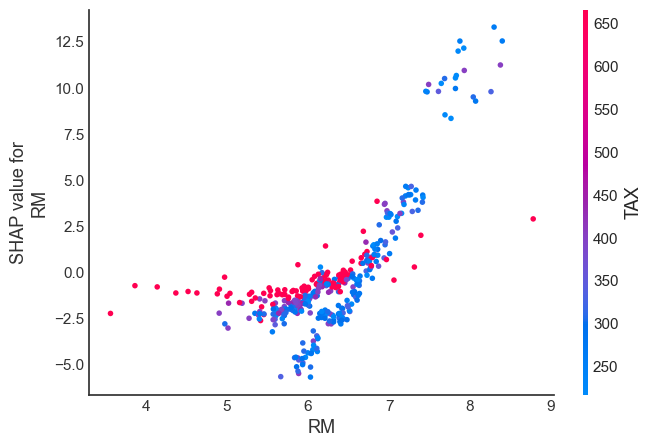

In [36]:
#방 개수 피처가 전체 데이터셋에 미치는 영향

shap.dependence_plot("RM", shap_values, X_train)

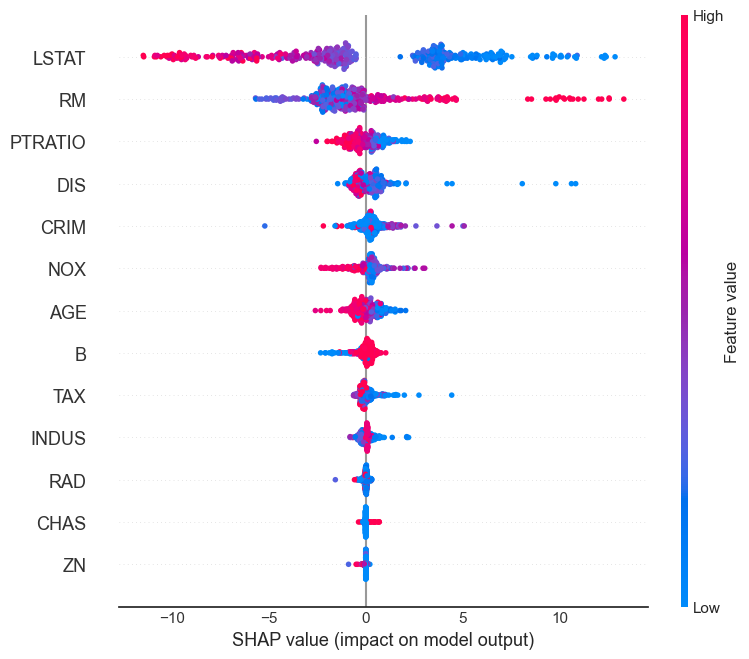

In [37]:
#전체 피처가 SHAP 값 결정에 어떻게 관여하는지 시각화

shap.summary_plot(shap_values, X_train)

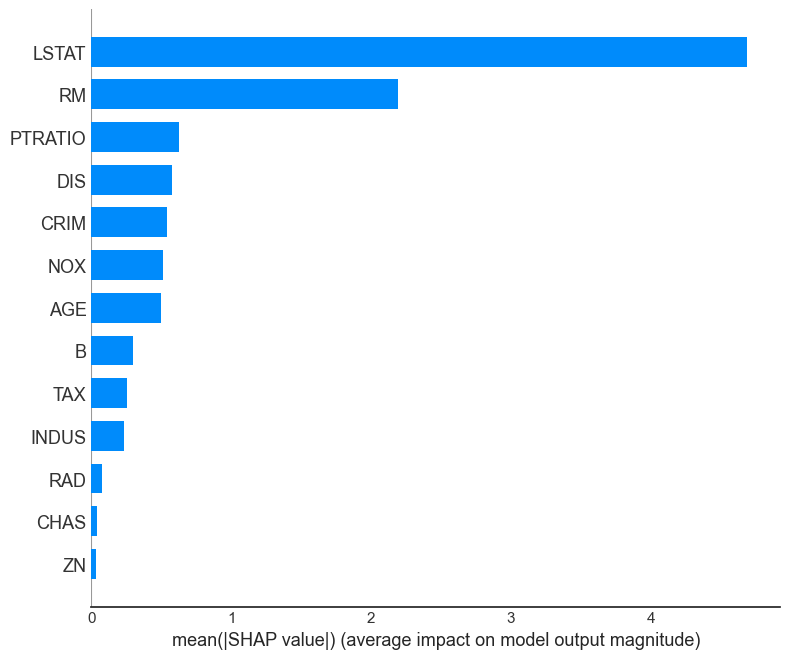

In [38]:
#막대 형식으로 표현(피처 중요도 기법과 유사한 시각화 형태)
shap.summary_plot(shap_values, X_train, plot_type='bar')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

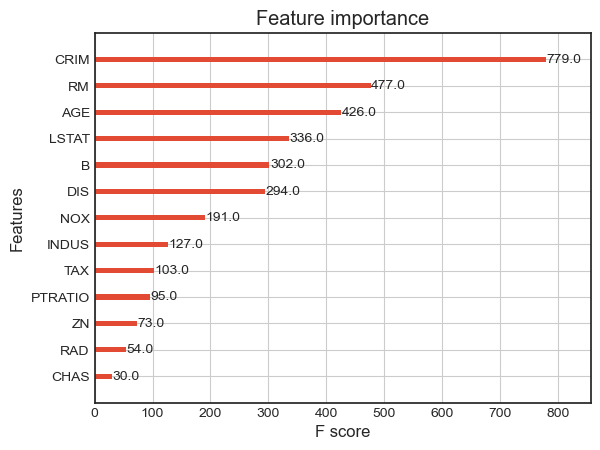

In [40]:
#xgboost의 피처 중요도를 호출

xgboost.plot_importance(model)